<a href="https://colab.research.google.com/github/sunnyskydream/Self-Projects/blob/main/%5BProject%5D_What_are_the_key_drivers_to_higher_BA_and_DS_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executive Summary
##Recommendation for higher compensation in Business Analyst and Data Scientist
1. Data Science title leads to higher pay than Business Analyst, so if possible, go for Data Scientist. 
2. Total yearly compensation among levels across companies varies, and is highly correlated base salary.
3. Charaters such as Male, White, PhD earn more.
4. Try to negotiate higher base salary or stock grant value as they plays the first two key drivers for above average total yearly compensation. 
5. For lower base salary (<\$136,500): location, company, level will come in play to influence your package.
6. For higher base salary(>\$136,500): most influencers are numerical attributes such as base salary, stock grant and bonus.
7. Due to small dataset, no matter which model I ran, it shows slightly overfitting: accuracy difference between train and test around 0.17%. And 10-fold cross validation is applied to check final accuracy.



#Dataset Description
The dataset is from Kaggle - [“Data Science and STEM Salaries- 62,000+ STEM salaries scraped from levels.fyi”](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries). Levels.fyi is a website for any anonymous to report their salary and could be used to compare career levels and compensation packages across different companies. This dataset includes 29 attributes and 62,000 records dated ranging from Jun. 7th,
2017, to Aug. 17th, 2021. Key attributes including company name, company level, title, location, total yearly compensation, race, education level etc.

#Question: What are the key drivers to higher BA and DS salary?
*higher here means above average total yearly compensation = \$185,067





# Package Load and Data Import


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import graphviz 
from sklearn import tree

In [ ]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
data = df.copy()
data.sample(3)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
51320,5/13/2021 10:04:02,Facebook,IC4,Software Engineer,311000,"New York, NY",5.0,2.0,Android,158000.0,137000.0,16000.0,Male,"Title: Software Engineer, Race: Hispanic / Lat...",10182,501.0,69673,0,1,0,0,0,0,0,0,0,1,Hispanic,Bachelor's Degree
5253,3/26/2019 15:58:54,Cisco,Grade 8,Product Designer,150000,"San Jose, CA",2.0,2.0,Design,120000.0,15000.0,15000.0,Male,NaN,7422,807.0,7095,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3344,12/23/2018 22:09:58,eBay,SE 2,Software Engineer,126000,"San Jose, CA",0.0,0.0,API Development (Back-End),113000.0,6000.0,10000.0,Male,NaN,7422,807.0,4617,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

#Subset and Drop Irrelevance

**Dubsetting to focus on job title with Business Analyst and Data Scientist**<br/>
 *Subset data includes title only in "Business Analyst" and "Data Scientist"
and dataset shrink from (62642, 29) to (3463, 29)*

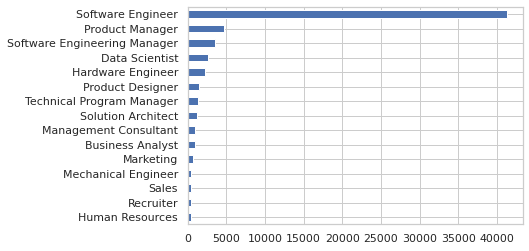

In [ ]:
data.title.value_counts().sort_values().plot(kind="barh")

In [ ]:
ba_ds_data_pre = data[(data.title == "Business Analyst") | (data.title == "Data Scientist")]
ba_ds_data_pre.sample(10)
ba_ds_data_pre.shape

(3463, 29)

**Drop irrelevant attributes and limit education and race in main category**<br/>
*After dropping columns, dataset shape decreases from (3463, 29) to (3463, 13)*

In [ ]:
ba_ds_data_pre.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [ ]:
drop_list = ['timestamp','tag','otherdetails','cityid', 'dmaid','rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree','Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic']
ba_ds_data_drop = ba_ds_data_pre.drop(drop_list, axis = 1)
ba_ds_data_drop.sample(5)
ba_ds_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463 entries, 419 to 62623
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  3463 non-null   object 
 1   level                    3448 non-null   object 
 2   title                    3463 non-null   object 
 3   totalyearlycompensation  3463 non-null   int64  
 4   location                 3463 non-null   object 
 5   yearsofexperience        3463 non-null   float64
 6   yearsatcompany           3463 non-null   float64
 7   basesalary               3463 non-null   float64
 8   stockgrantvalue          3463 non-null   float64
 9   bonus                    3463 non-null   float64
 10  gender                   2267 non-null   object 
 11  Race                     1355 non-null   object 
 12  Education                1931 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 378.8+ KB


#Handle with Missing Data

*1. Drop na in level, which counts only 0.43% <br/>2. Fill 'Unknown' to categorical attributes.*

In [ ]:
# Check for missing data
missing = ba_ds_data_drop.isna().sum() 

print("The percentage of each feature's missing values are as follow:")
round(missing / len(ba_ds_data_drop) * 100, 2)

The percentage of each feature's missing values are as follow:


company                     0.00
level                       0.43
title                       0.00
totalyearlycompensation     0.00
location                    0.00
yearsofexperience           0.00
yearsatcompany              0.00
basesalary                  0.00
stockgrantvalue             0.00
bonus                       0.00
gender                     34.54
Race                       60.87
Education                  44.24
dtype: float64

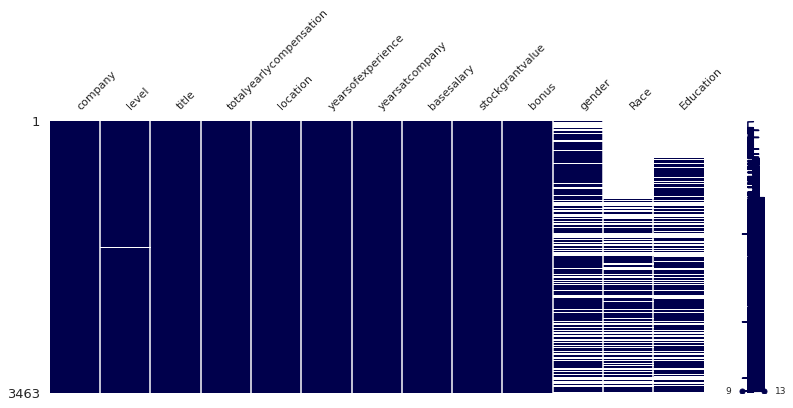

In [ ]:
msno.matrix(ba_ds_data_drop, figsize=(13, 5), fontsize=11, color=(0., 0., 0.3))

In [ ]:
ba_ds_data_drop = ba_ds_data_drop.dropna(subset=['level'])

In [ ]:
# gender
ba_ds_data_drop.gender.value_counts()
ba_ds_data_drop.Race.value_counts()
ba_ds_data_drop.Education.value_counts()

#fill na with Unknown
ba_ds_data = ba_ds_data_drop.fillna('Unknown')

ba_ds_data.shape
ba_ds_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3448 entries, 419 to 62623
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  3448 non-null   object 
 1   level                    3448 non-null   object 
 2   title                    3448 non-null   object 
 3   totalyearlycompensation  3448 non-null   int64  
 4   location                 3448 non-null   object 
 5   yearsofexperience        3448 non-null   float64
 6   yearsatcompany           3448 non-null   float64
 7   basesalary               3448 non-null   float64
 8   stockgrantvalue          3448 non-null   float64
 9   bonus                    3448 non-null   float64
 10  gender                   3448 non-null   object 
 11  Race                     3448 non-null   object 
 12  Education                3448 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 377.1+ KB


**Data summary**<br/>
*1. Data shape (3448, 13) <br/>2.Six numerical attribtues and seven categorical attributes.*



# Explore Data Analysis


**Data overview**<br/>
*1.Most of the data comes from company in Amazon, Microsoft, Facebook, Google, Capital one. <br/>2.L5, L4, L3, L6, L2 are the most common level name.  <br/>3.Most of the title are Data Scientist, 3x more than Business Analyst. <br/>4.Male reports more than Female in the dataset.<br/>5.Most reported data shows in Master's and Bachelor's degree.<br/>6.Asian and White are the most common race.*


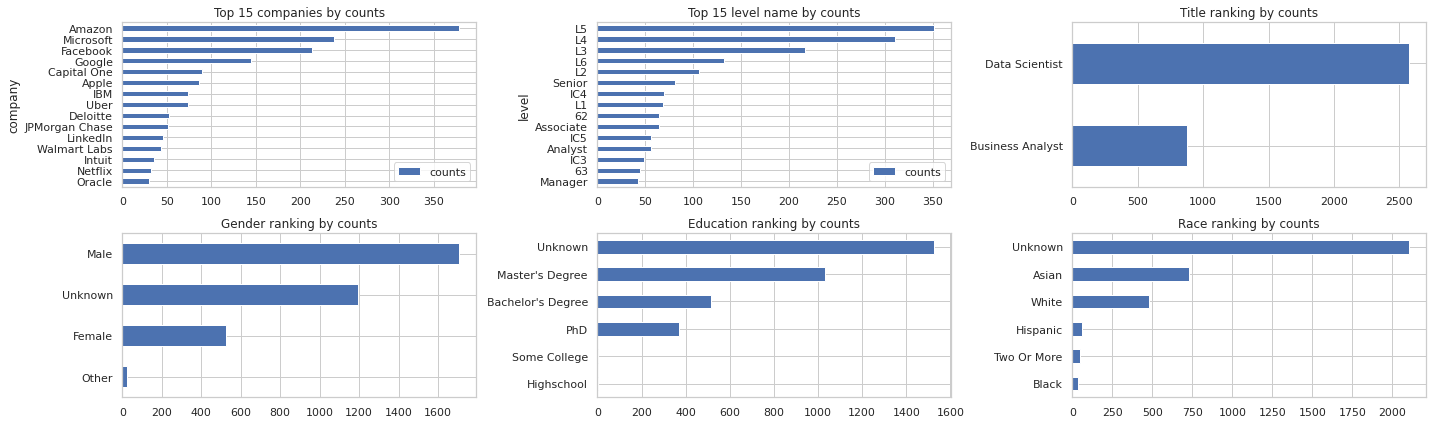

In [ ]:
fig = plt.figure(figsize=(20,6))

sub1 = fig.add_subplot(2,3,1)
company_weight_df = pd.DataFrame(ba_ds_data.groupby('company').company.count().sort_values(ascending = False))
company_weight_df.columns = ['counts']
company_weight_df.head(15)
company_weight_df[0:15].sort_values(by = 'counts').plot(kind="barh", title = "Top 15 companies by counts", ax = sub1)

sub2 = fig.add_subplot(2,3,2)
level_weight_df = pd.DataFrame(ba_ds_data.groupby('level').company.count().sort_values(ascending = False))
level_weight_df.columns = ['counts']
level_weight_df.head(15)
level_weight_df[0:15].sort_values(by = 'counts').plot(kind="barh", title = "Top 15 level name by counts", ax = sub2)

sub3 = fig.add_subplot(2,3,3)
ba_ds_data.title.value_counts().sort_values().plot(kind="barh",  title = "Title ranking by counts", ax = sub3)

sub4 = fig.add_subplot(2,3,4)
ba_ds_data.gender.value_counts().sort_values().plot(kind="barh", title = "Gender ranking by counts", ax = sub4)

sub5 = fig.add_subplot(2,3,5)
ba_ds_data.Education.value_counts().sort_values().plot(kind="barh", title = "Education ranking by counts", ax = sub5)

sub6 = fig.add_subplot(2,3,6)
ba_ds_data.Race.value_counts().sort_values().plot(kind="barh",title = "Race ranking by counts", ax = sub6)

plt.tight_layout()

**Numerical attribution relationship**

*1.Most numeric attributes are right skewed, and the total yearly compensation and base salary are less skewed  <br/>
2.Total year compensation positive correlates to base salary, stock grant value, and bonus<br/>
3.Year of experience positive correlates to years at company<br/>*

In [ ]:
ba_ds_data.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000
mean,185067.285383,5.207947,2.148738,129321.055684,34047.563805,16300.174014
std,105562.906544,4.308589,2.429048,61021.755577,56743.024885,21122.340530
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115000.000000,2.000000,1.000000,95000.000000,0.000000,2000.000000
50%,165000.000000,4.000000,2.000000,130000.000000,13000.000000,12000.000000
75%,230000.000000,7.000000,3.000000,160000.000000,45000.000000,22000.000000
max,1000000.000000,45.000000,24.000000,700000.000000,700000.000000,350000.000000


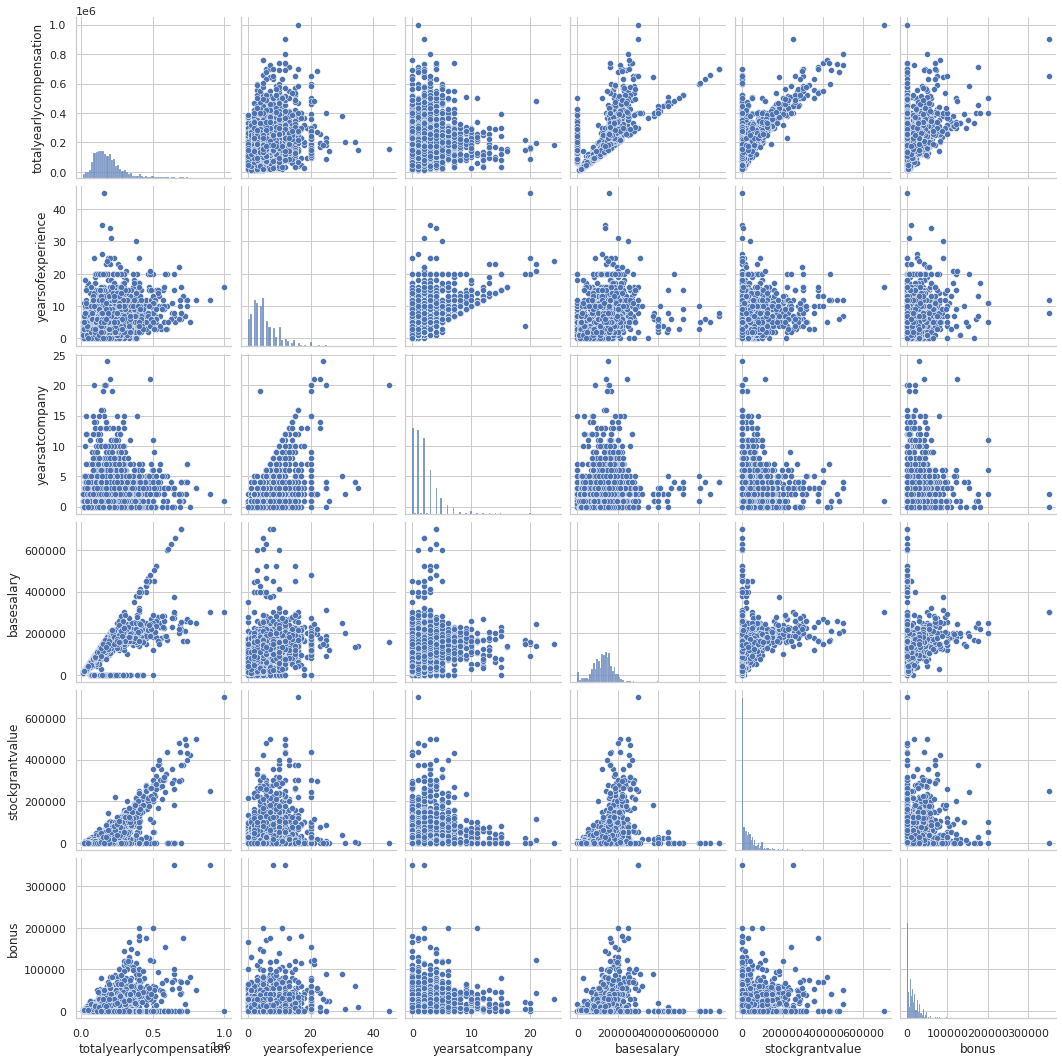

In [ ]:
sns.pairplot(ba_ds_data)

**Categorical attribution relationship**

Title<br/>

*1.The total average compensation by title: Data Scientist \$203,814 > Business Analyst \$130,023 <br/>*

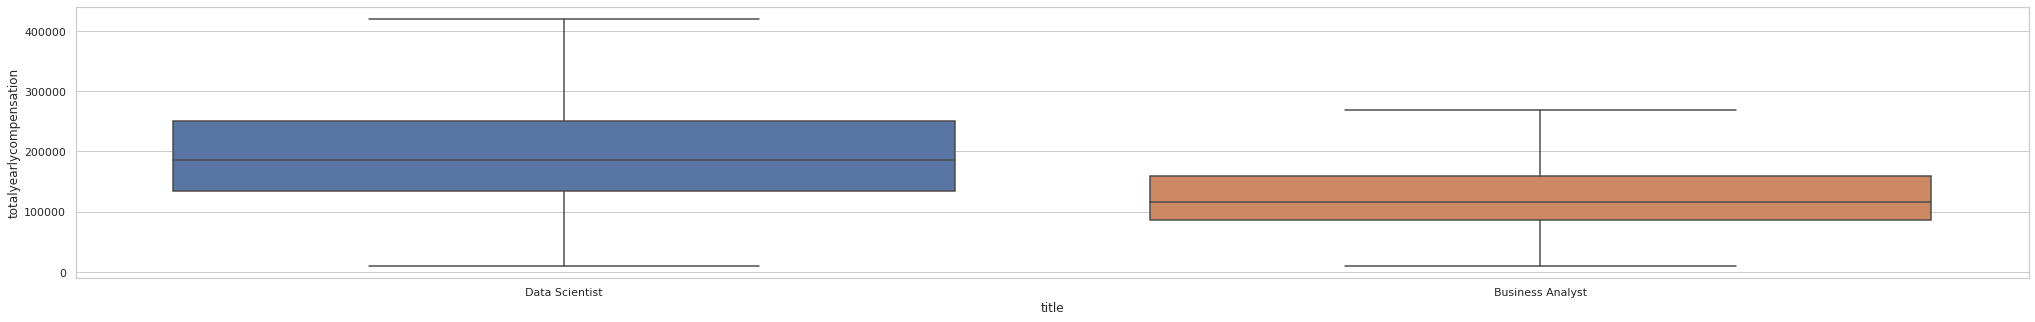

In [ ]:
f, ax = plt.subplots(figsize=(35, 5))
fig = sns.boxplot(x='title', y='totalyearlycompensation',data=ba_ds_data, showfliers = False)

In [ ]:
ba_ds_data.groupby('title').totalyearlycompensation.mean().sort_values(ascending=False)

title
Data Scientist      203814.541213
Business Analyst    130023.972603
Name: totalyearlycompensation, dtype: float64

Company<br/>
*1.The top five high pay companies of the total average compensation are Netflix(\$469,468)> Apple(\$261,593)> Uber(\$252,189) > Facebook (\$246,985)> Google(\$242,180).<br/>2.Netflix pays way more than other companies. <br/>3.For most of the companies, Data Scientist got paid way more than Business Analyst. <br/>*

In [ ]:
top_15_company_name = company_weight_df[0:15].index
top_15_company_data = ba_ds_data[ba_ds_data.company.isin(top_15_company_name)]

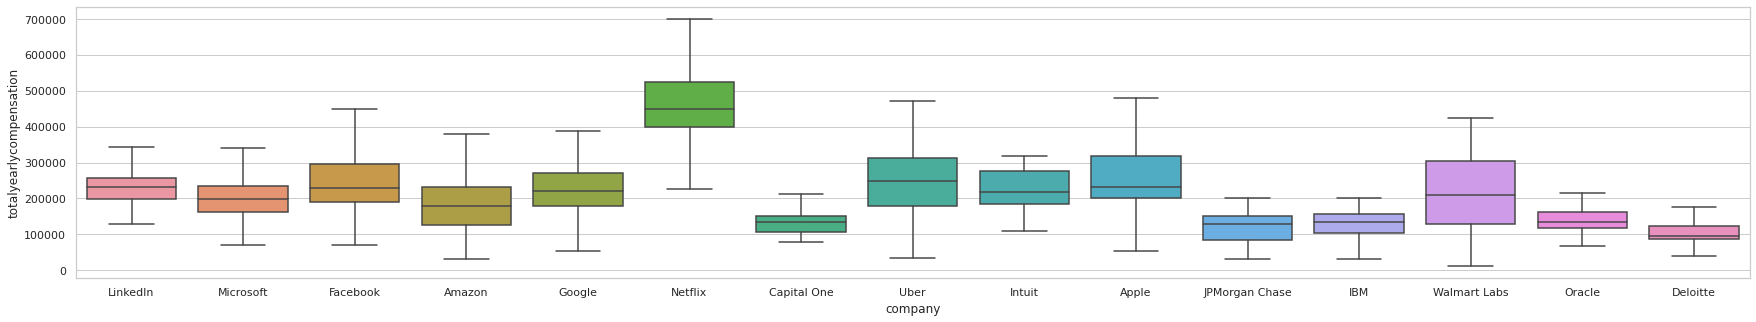

In [ ]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='company', y='totalyearlycompensation', data=top_15_company_data, showfliers = False)

In [ ]:
top_15_company_data.groupby('company').totalyearlycompensation.mean().sort_values(ascending=False)

company
Netflix           469468.750000
Apple             261593.023256
Uber              252189.189189
Facebook          246985.915493
Google            242180.555556
Intuit            227916.666667
LinkedIn          222521.739130
Microsoft         211088.235294
Walmart Labs      210976.744186
Amazon            193894.179894
Oracle            143833.333333
Capital One       137438.202247
IBM               133905.405405
JPMorgan Chase    129176.470588
Deloitte          106500.000000
Name: totalyearlycompensation, dtype: float64

[Text(0, 0, 'LinkedIn'),
 Text(0, 0, 'Microsoft'),
 Text(0, 0, 'Facebook'),
 Text(0, 0, 'Amazon'),
 Text(0, 0, 'Google'),
 Text(0, 0, 'Netflix'),
 Text(0, 0, 'Capital One'),
 Text(0, 0, 'Uber'),
 Text(0, 0, 'Intuit'),
 Text(0, 0, 'Apple'),
 Text(0, 0, 'JPMorgan Chase'),
 Text(0, 0, 'IBM'),
 Text(0, 0, 'Walmart Labs'),
 Text(0, 0, 'Oracle'),
 Text(0, 0, 'Deloitte')]

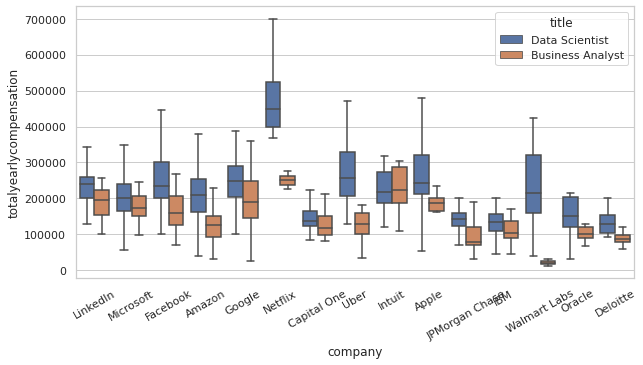

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='company', y='totalyearlycompensation', hue="title",data=top_15_company_data, showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Level<br/>
*1. IC5 \$277,910 > IC4 \$214,275 ; L6 \$266,151 > L5 \$220,082 ;  63 \$211,568 > 62 \$186,250<br/> 2. However, level names could be used across companies, and given the same level, the total average compensation varies. <br/>*

In [ ]:
top_15_level_name = level_weight_df[0:15].index
top_15_level_data = ba_ds_data[ba_ds_data.level.isin(top_15_level_name)]

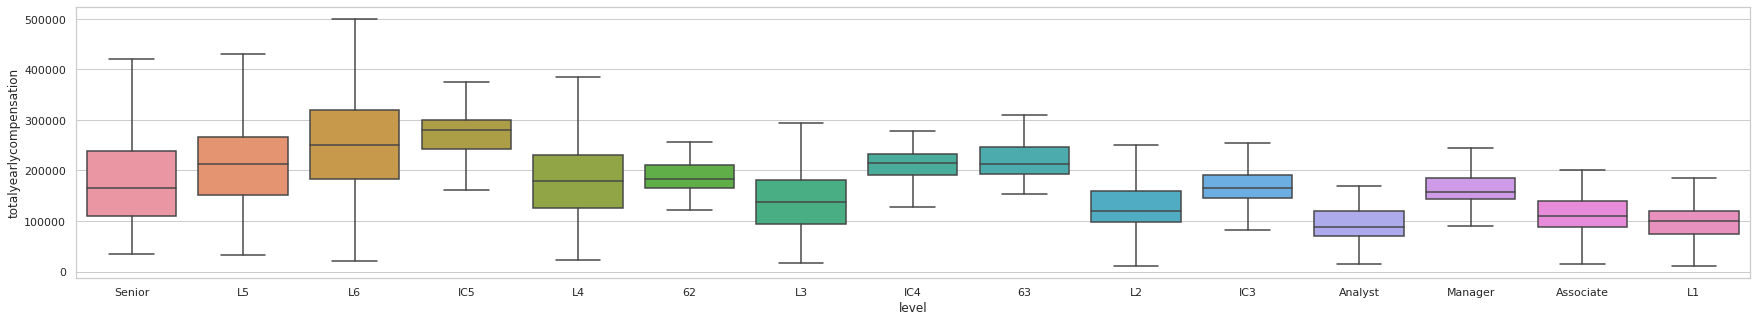

In [ ]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='level', y='totalyearlycompensation', data=top_15_level_data, showfliers = False)

In [ ]:
top_15_level_data.groupby('level').totalyearlycompensation.mean().sort_values(ascending=False)

level
IC5          277910.714286
L6           266151.515152
L5           220082.621083
IC4          214275.362319
63           211568.181818
Senior       197555.555556
62           186250.000000
L4           184533.762058
Manager      169666.666667
IC3          166795.918367
L3           145764.976959
L2           130613.207547
Associate    113156.250000
L1            98352.941176
Analyst       93250.000000
Name: totalyearlycompensation, dtype: float64

[Text(0, 0, 'Senior'),
 Text(0, 0, 'L5'),
 Text(0, 0, 'L6'),
 Text(0, 0, 'IC5'),
 Text(0, 0, 'L4'),
 Text(0, 0, '62'),
 Text(0, 0, 'L3'),
 Text(0, 0, 'IC4'),
 Text(0, 0, '63'),
 Text(0, 0, 'L2'),
 Text(0, 0, 'IC3'),
 Text(0, 0, 'Analyst'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'L1')]

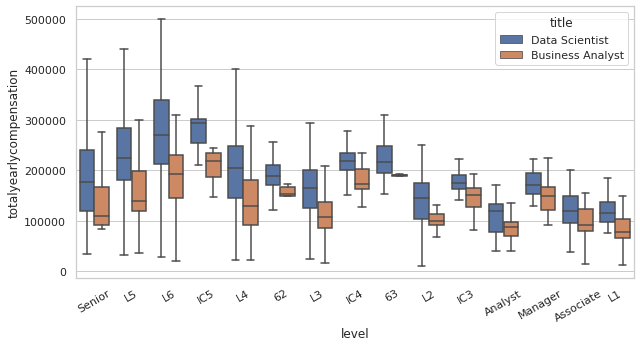

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='level', y='totalyearlycompensation', hue="title",data=top_15_level_data, showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [ ]:
top_15_level_data.groupby(['company','level']).totalyearlycompensation.mean().sort_values(ascending=False)[0:11]

company       level 
Snap          L5        728000.000000
Netflix       L6        630000.000000
Stitch Fix    L6        580000.000000
Robinhood     L4        550000.000000
Credit Karma  L5        520000.000000
Lyft          IC5       500000.000000
Roblox        IC5       498000.000000
Google        L6        489200.000000
Instacart     L6        486500.000000
Netflix       Senior    471666.666667
Asana         L5        471000.000000
Name: totalyearlycompensation, dtype: float64

*sample of reported most company levels*

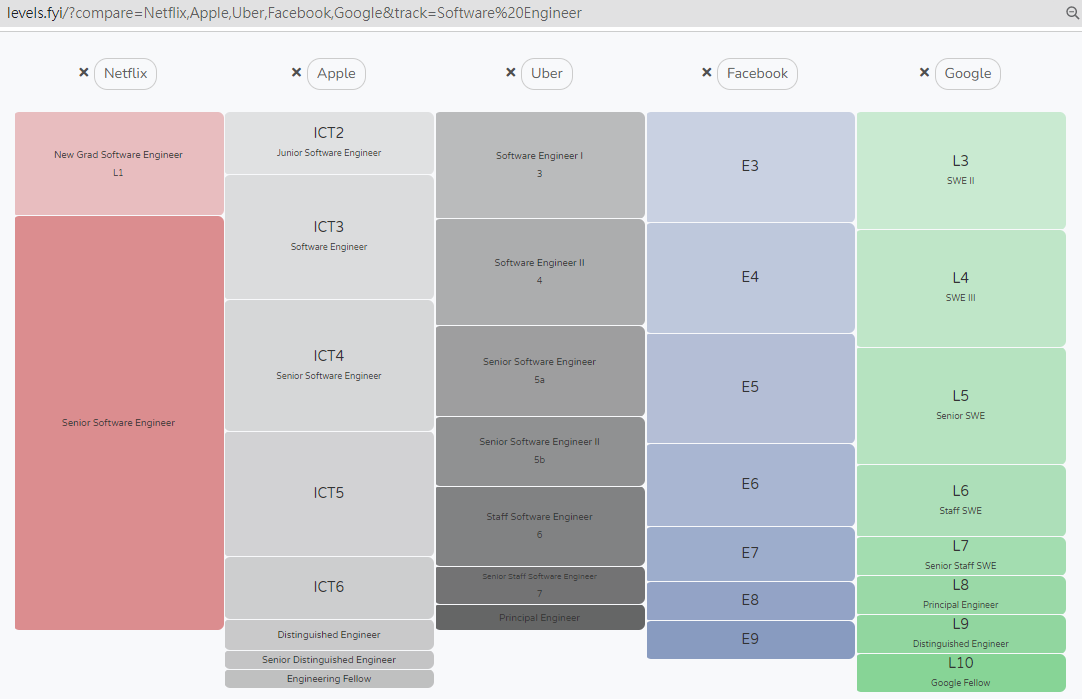

Gender<br/>

*1.Male \$186,151 > Female \$170,5301, and the difference is \$15,621<br/>*

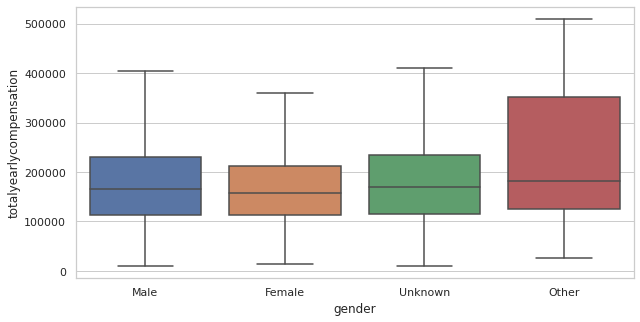

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='gender', y='totalyearlycompensation', data=ba_ds_data, showfliers = False)

In [ ]:
ba_ds_data.groupby('gender').totalyearlycompensation.mean().sort_values(ascending=False)

gender
Other      254083.333333
Unknown    188540.268456
Male       186151.817116
Female     170530.418251
Name: totalyearlycompensation, dtype: float64

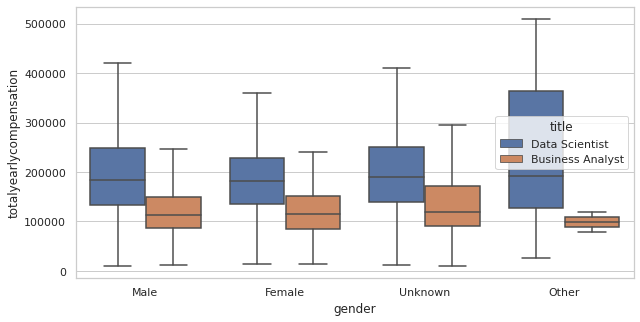

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='gender', y='totalyearlycompensation', hue="title",data=ba_ds_data, showfliers = False)

Education<br/>

*1. By looking at the average total compensation: PhD \$253,402 > Master's Degree \$175,914 > Bachelor's Degree \$137,359 > Highschool \$122,250 > Some College \$106,000
<br/>*

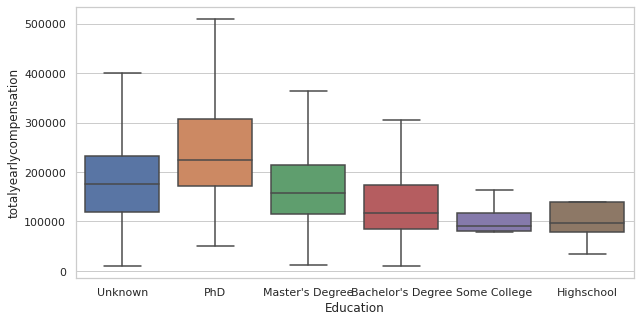

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Education', y='totalyearlycompensation', data=ba_ds_data, showfliers = False)

In [ ]:
ba_ds_data.groupby('Education').totalyearlycompensation.mean().sort_values(ascending=False)

Education
PhD                  253402.702703
Unknown              191127.213115
Master's Degree      175914.645975
Bachelor's Degree    137359.922179
Highschool           122250.000000
Some College         106000.000000
Name: totalyearlycompensation, dtype: float64

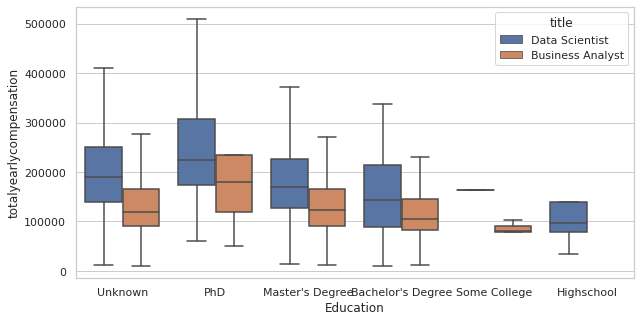

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Education', y='totalyearlycompensation', hue="title",data=ba_ds_data, showfliers = False)

Race<br/>

*1. By looking at the average total compensation: White \$178,278 > Two Or More \$175,645 > Asian \$168,655 > Hispanic \$163,448 > Black \$117,441<br/>2. The difference between White and Black is \$60,837  <br/>*

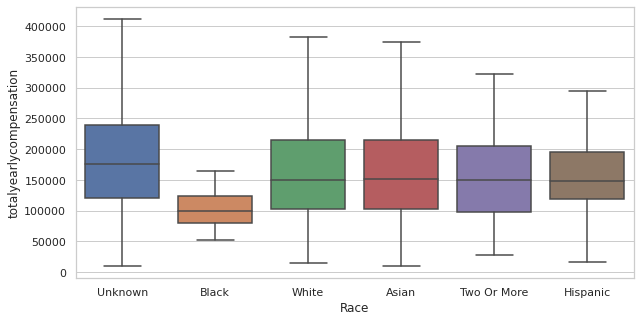

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Race', y='totalyearlycompensation', data=ba_ds_data, showfliers = False)

In [ ]:
ba_ds_data.groupby('Race').totalyearlycompensation.mean().sort_values(ascending=False)

Race
Unknown        194205.042816
White          178278.825996
Two Or More    175645.833333
Asian          168655.692730
Hispanic       163448.275862
Black          117441.176471
Name: totalyearlycompensation, dtype: float64

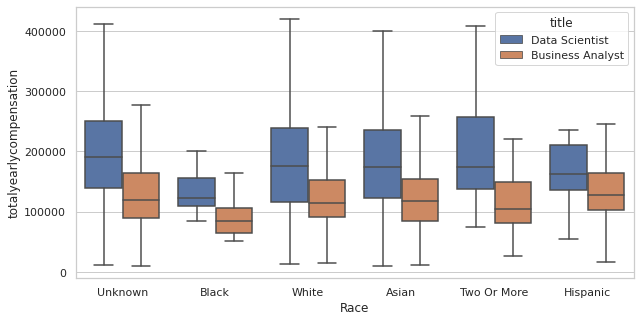

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Race', y='totalyearlycompensation', hue="title",data=ba_ds_data, showfliers = False)

#Classifier Data Preparation

**Data Preparation**


In [ ]:
ba_ds_data

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
419,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,162000.0,220000.0,10000.0,Male,Unknown,Unknown
440,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,165000.0,28000.0,23000.0,Male,Unknown,Unknown
444,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,0.0,0.0,0.0,Female,Unknown,Unknown
454,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,200000.0,280000.0,20000.0,Male,Unknown,Unknown
495,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,190000.0,140000.0,40000.0,Male,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62240,IBM,8,Data Scientist,155000,"Washington, DC",5.0,2.0,141000.0,0.0,14000.0,Male,Unknown,Unknown
62283,Facebook,E3,Data Scientist,150000,"Singapore, SG, Singapore",0.0,0.0,150000.0,30000.0,30000.0,Female,Unknown,Unknown
62285,ADP,Sr UX Researcher 4,Data Scientist,185000,"Roseland, NJ",8.0,2.0,150000.0,20000.0,15000.0,Male,Unknown,Unknown
62529,Google,T6,Data Scientist,685000,"Kirkland, WA",22.0,2.0,221000.0,296000.0,55000.0,Male,Unknown,Unknown


In [ ]:
ba_ds_data.describe()
#totalyearlycompensation mean = 185067

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000
mean,185067.285383,5.207947,2.148738,129321.055684,34047.563805,16300.174014
std,105562.906544,4.308589,2.429048,61021.755577,56743.024885,21122.340530
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115000.000000,2.000000,1.000000,95000.000000,0.000000,2000.000000
50%,165000.000000,4.000000,2.000000,130000.000000,13000.000000,12000.000000
75%,230000.000000,7.000000,3.000000,160000.000000,45000.000000,22000.000000
max,1000000.000000,45.000000,24.000000,700000.000000,700000.000000,350000.000000


In [ ]:
df= ba_ds_data.copy()
df.shape

(3448, 13)

Label Encoding

In [ ]:
# gender
le_gender = LabelEncoder()
df['gender']=df[['gender']].apply(le_gender.fit_transform)

# Race
le_race = LabelEncoder()
df['Race']=df[['Race']].apply(le_race.fit_transform)

# Education
le_education = LabelEncoder()
df['Education']=df[['Education']].apply(le_education.fit_transform)

# company
le_company = LabelEncoder()
df['company']=df[['company']].apply(le_company.fit_transform)
# list(le_company.inverse_transform([5, 2, 1]))

# level
le_level = LabelEncoder()
df['level']=df[['level']].apply(le_level.fit_transform)

# title
le_title = LabelEncoder()
df['title']=df[['title']].apply(le_title.fit_transform)

# location
le_title = LabelEncoder()
df['location']=df[['location']].apply(le_title.fit_transform)

In [ ]:
df['flg'] = df['totalyearlycompensation'].map(lambda x: 1 if x > 185067 else 0)
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education,flg
419,293,410,1,233000,224,4.0,0.0,162000.0,220000.0,10000.0,1,4,5,1
440,326,60,1,218000,232,11.0,11.0,165000.0,28000.0,23000.0,1,4,5,1
444,570,30,1,180000,225,10.0,5.0,0.0,0.0,0.0,0,4,5,0
454,499,460,1,500000,224,4.0,4.0,200000.0,280000.0,20000.0,1,4,5,1
495,186,46,1,370000,232,8.0,3.0,190000.0,140000.0,40000.0,1,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62240,246,68,1,155000,268,5.0,2.0,141000.0,0.0,14000.0,1,4,5,0
62283,186,190,1,150000,236,0.0,0.0,150000.0,30000.0,30000.0,0,4,5,0
62285,6,456,1,185000,216,8.0,2.0,150000.0,20000.0,15000.0,1,4,5,0
62529,224,477,1,685000,121,22.0,2.0,221000.0,296000.0,55000.0,1,4,5,1


#Decision Tree

In [ ]:
X = df.drop(['flg', 'totalyearlycompensation'], axis = 1)
y = df['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9679040989945862
0.9501160092807425


In [ ]:
# due to small dataset, use 10-fold cross-validation

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
model.fit(X,y)
scores = cross_val_score(model, X, y, cv = 10)

print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.76811594 0.93043478 0.96811594 0.96521739 0.95942029 0.95072464
 0.95072464 0.97101449 0.9622093  0.97674419]
Cross validation scores: 0.940+-0.058714


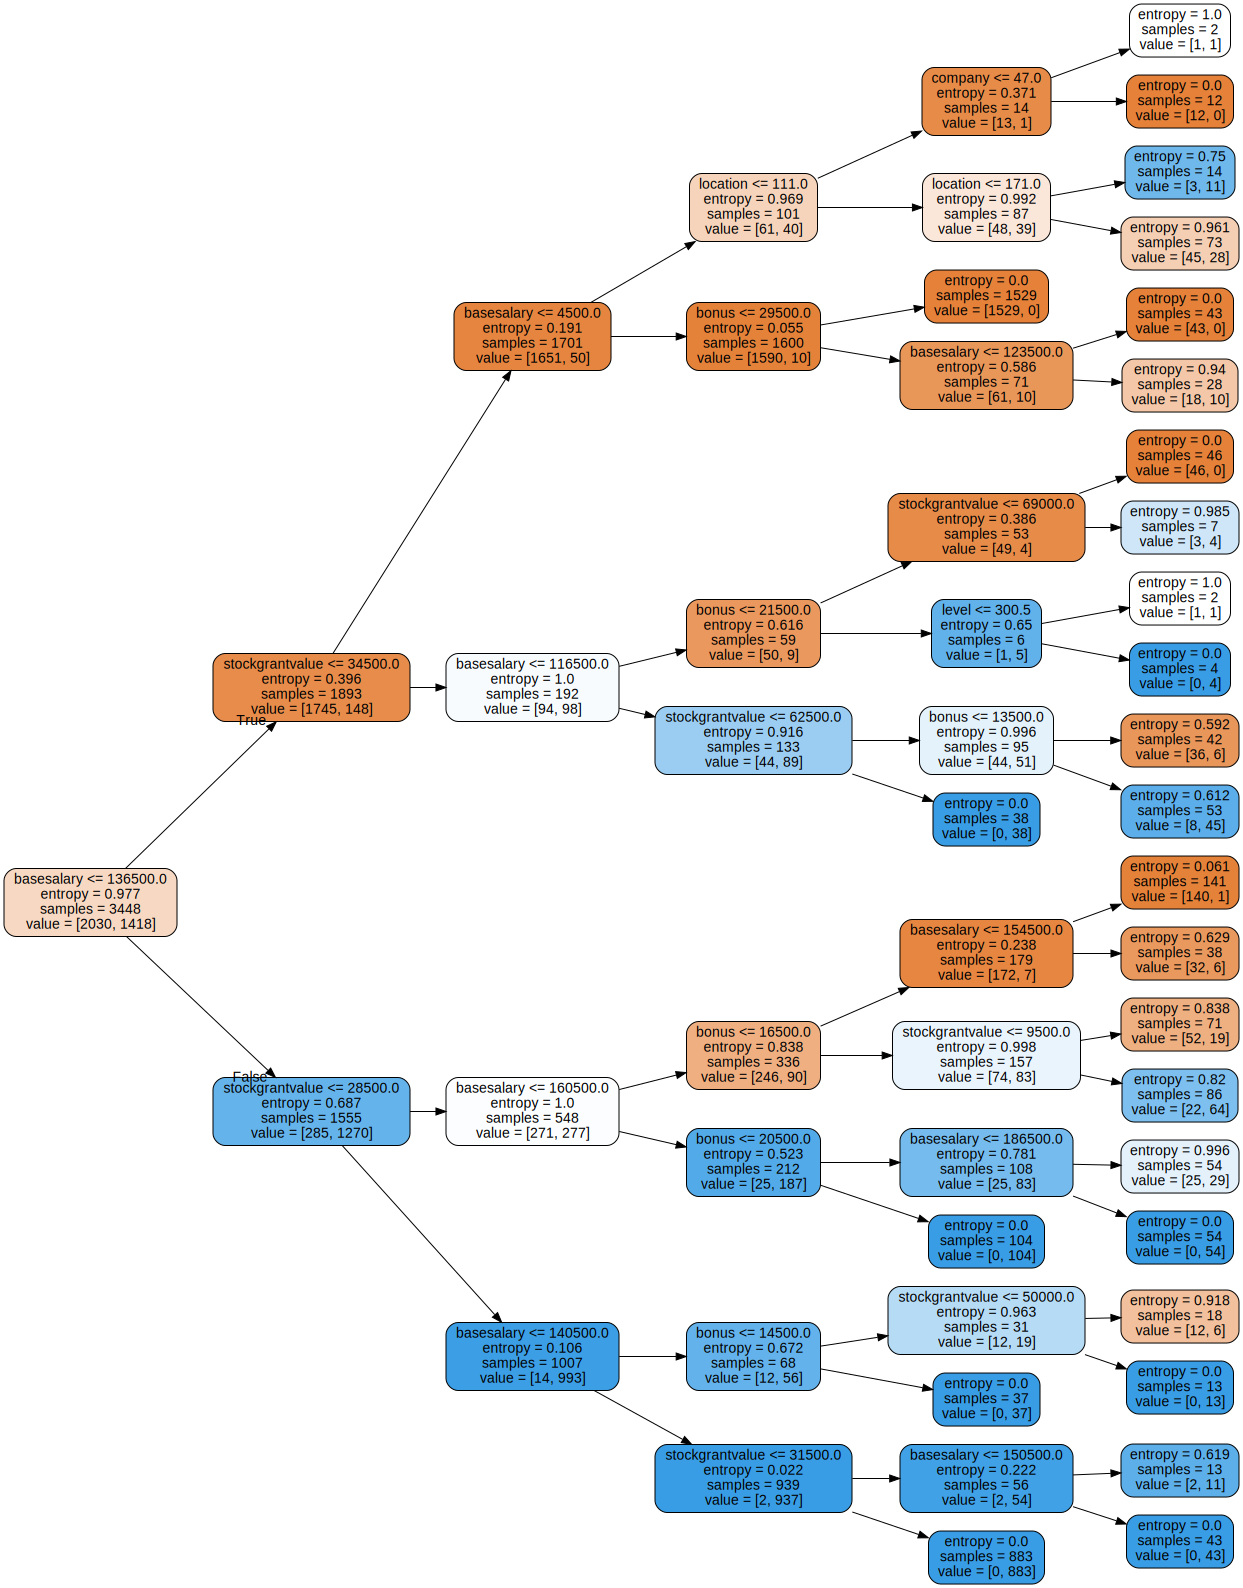

In [ ]:
#tree plotting
dot_data = tree.export_graphviz(model, feature_names=X.columns, out_file=None, filled = True, rotate = True, rounded = True) 
graph = graphviz.Source(dot_data) 
graph


**Decision Tree Summary**<br/>
*1.with train and test set split, it comes to a slight overfitting problem dueto small data, so with 10-fold cross validation and the accuracy is slightly decrease to 0.94. <br/>2. basesalary and stockgrantvalue plays the first two key drivers for total yearly compensation.<br/>3. for lower base salary, location, company, level will come in play to influence your package. <br/> 4. for higher base salary, most influencer are numerical attributes .<br/> 5. However, gender, race and education doesn't indicate any high impact on higher salary triage as we have seen in exploration.*

#Regression 

*check multicollinearity <br/>*
https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc

In [ ]:
df.head(5)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education,flg
419,293,410,1,233000,224,4.0,0.0,162000.0,220000.0,10000.0,1,4,5,1
440,326,60,1,218000,232,11.0,11.0,165000.0,28000.0,23000.0,1,4,5,1
444,570,30,1,180000,225,10.0,5.0,0.0,0.0,0.0,0,4,5,0
454,499,460,1,500000,224,4.0,4.0,200000.0,280000.0,20000.0,1,4,5,1
495,186,46,1,370000,232,8.0,3.0,190000.0,140000.0,40000.0,1,4,5,1


In [ ]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'Race', 'Education', 'flg'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_variables = df[['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'Race', 'Education']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data.sort_values(by = 'VIF', ascending=False)

,feature,VIF
3,totalyearlycompensation,46.044691
7,basesalary,19.444857
12,Education,6.355449
8,stockgrantvalue,6.176745
11,Race,4.942915
4,location,4.809176
1,level,4.504319
2,title,4.340687
10,gender,4.325243
5,yearsofexperience,3.930648


**Lasso Regression for Feature Selection**

In [ ]:
from sklearn.linear_model import Lasso
X = df.drop(['flg', 'totalyearlycompensation'], axis = 1)
y = df['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = Lasso(random_state=0)
model.fit(X_train_std, y_train)

print(model.score(X_train_std, y_train))
print(model.score(X_test_std, y_test))


0.0
-0.0001993609374391081


In [ ]:
# due to small dataset, use 10-fold cross-validation
model = Lasso()
model.fit(X,y)
scores = cross_val_score(model, X, y, cv = 10)

print('Cross validation scores_Lasso: {}'.format(scores))
print('Cross validation scores_Lasso: {:.3f}+-{:3f}'.format(scores.mean(), scores.std()))

Cross validation scores_Lasso: [-0.15858083  0.40527683  0.55047683  0.5660031   0.52537179  0.57893739
  0.52852712  0.60661012  0.52735465  0.49687302]
Cross validation scores_Lasso: 0.463+-0.213423


In [ ]:
coef = model.coef_
coef_df = pd.DataFrame(coef.T)
coef_df = np.exp(coef_df)
coef_df['attributes'] = X_train.columns
coef_df.columns = ["coeff_odd_ratio", "attributes"]
coef_df
coef_df.set_index('attributes').sort_values(by = 'coeff_odd_ratio', ascending = False)

,coeff_odd_ratio
attributes,
location,1.000223
level,1.000037
bonus,1.000004
stockgrantvalue,1.000003
basesalary,1.000003
company,1.000000
title,1.000000
yearsofexperience,1.000000
yearsatcompany,1.000000


**Logistic Regression**

In [ ]:
X = df.drop(['flg', 'totalyearlycompensation'], axis = 1)
y = df['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)

print(model.score(X_train_std, y_train))
print(model.score(X_test_std, y_test))

0.9435421500386698
0.9419953596287703


In [ ]:
# due to small dataset, use 10-fold cross-validation
model = LogisticRegression()
model.fit(X,y)
scores = cross_val_score(model, X, y, cv = 10)

print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.77971014 0.80869565 0.88985507 0.89275362 0.83478261 0.88405797
 0.86086957 0.88115942 0.86627907 0.85465116]
Cross validation scores: 0.855+-0.035428


In [ ]:
coef = model.coef_
coef_df = pd.DataFrame(coef.T)
coef_df = np.exp(coef_df)
coef_df['attributes'] = X_train.columns
coef_df.columns = ["coeff_odd_ratio", "attributes"]
coef_df
coef_df.set_index('attributes').sort_values(by = 'coeff_odd_ratio', ascending = False)

,coeff_odd_ratio
attributes,
stockgrantvalue,1.000071
bonus,1.000044
basesalary,1.000008
title,0.999970
gender,0.999882
yearsofexperience,0.999877
yearsatcompany,0.999850
Education,0.999820
Race,0.999742


**Regression Summary<br/>**
*1. By checking multicollinearity, base salary is highly correlated to totalyearlycompensation. But since the totalyearlycompensation is binned to binary, we could still use base salary in our analysis. <br/>2. Lasso Regression for Feature Selection shows all feature concerns, but since the accuracy is around 0.463, we might skip the finding. <br/>3. LogisticRegression confirmed the three key drivers as stock greant value, bonus and base salary, but stock greant value plays higher weight more than the base salary compared with Decision Tree.<br/> 4. The rest 9 attributes all have positive impact on total package.<br/>*

#Ensemble: RandomForest, GradientBoosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X = df.drop(['flg', 'totalyearlycompensation'], axis = 1)
y = df['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

models = {
    'RandomForest': RandomForestClassifier(random_state = 0),
    'GradientBoost': GradientBoostingClassifier(random_state = 0)
}

scores = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train,y_train)
  scores[(model_name, 'test_score')] = model.score(X_test,y_test)

pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.970998,0.992653
RandomForest,0.974478,1.000000


**Ensemble Summary<br/>**
*1. Due to small dataset, though ensemble method shows high accuracy, in the same time, it shows slightly overfitting as well.*